In [18]:
# Import the neccessary libraries
# Epsilon-Insensitive tube is found in SVR
# support.nac
# naga.gu
# ithelpdesk.bcc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Importing the dataset
data = pd.read_csv('pos_salaries_svr.csv')
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

In [20]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [21]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [22]:
y_re = y.reshape(len(y),1)
print(y_re)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y_re = sc_y.fit_transform(y_re)


In [24]:
print(y_re)
print(X)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [25]:
# Training SVR model on whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
# Gaussian RBF kernel. SVM kernel functions
regressor.fit(X,y_re)

D:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [29]:
# predicting a new result. Applying inverse transform to output.
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

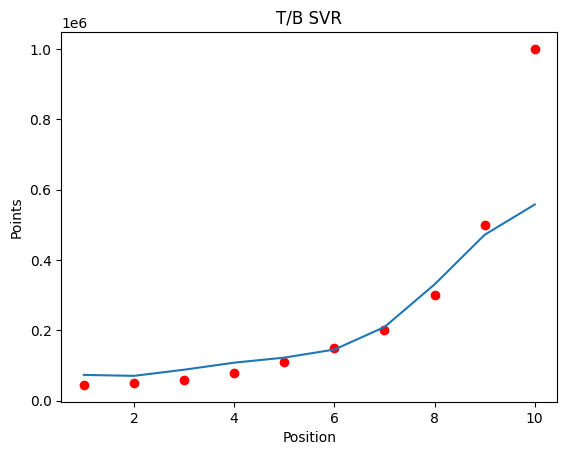

In [30]:
# Visualizing the result:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y_re),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)))
plt.title('T/B SVR')
plt.xlabel('Position')
plt.ylabel('Points')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15852\3846422071.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)),0.1)


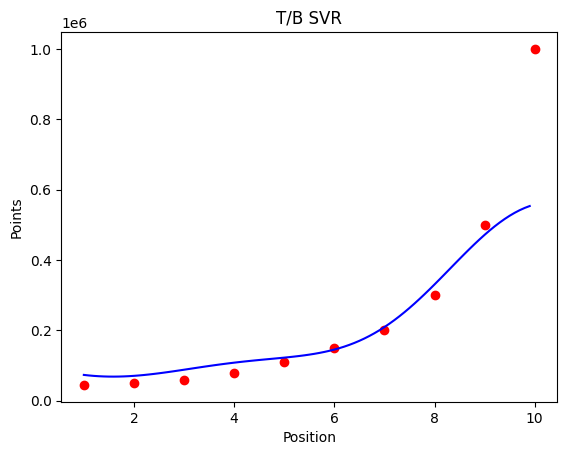

In [31]:
# Visualizing the result for higher resolution
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y_re),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color='blue')
plt.title('T/B SVR')
plt.xlabel('Position')
plt.ylabel('Points')
plt.show()